In [4]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller

In [2]:
#Creating a non stationary dataset
dates = pd.date_range('2023-01-01', periods=24, freq='M')
non_stationary_data = pd.Series([10,14,18,20,24,28,32,36,40,44,48,52,56,60,
                                24,28,32,36,40,44,48,52,56,60], index=dates)

In [5]:
adf_result = adfuller(non_stationary_data)
print(f"p-value: {adf_result[1]}")

p-value: 0.44743997327754553


In [6]:
#Log Transformation
log_transformed_data = np.log(non_stationary_data)

#Box Cox Transformation
boxcox_tranformed_data, _ = boxcox(non_stationary_data)

#Detrend using diffrencing
detrend_data = non_stationary_data.diff().dropna()

#Deseasoning
resampled_data = non_stationary_data.resample('M').mean()
resampled_data = resampled_data.interpolate(method='linear')
result = seasonal_decompose(resampled_data, model='additive', period = 3)
seasonal_comp = result.seasonal
deseasoned_data = non_stationary_data - seasonal_comp.loc[non_stationary_data.index]

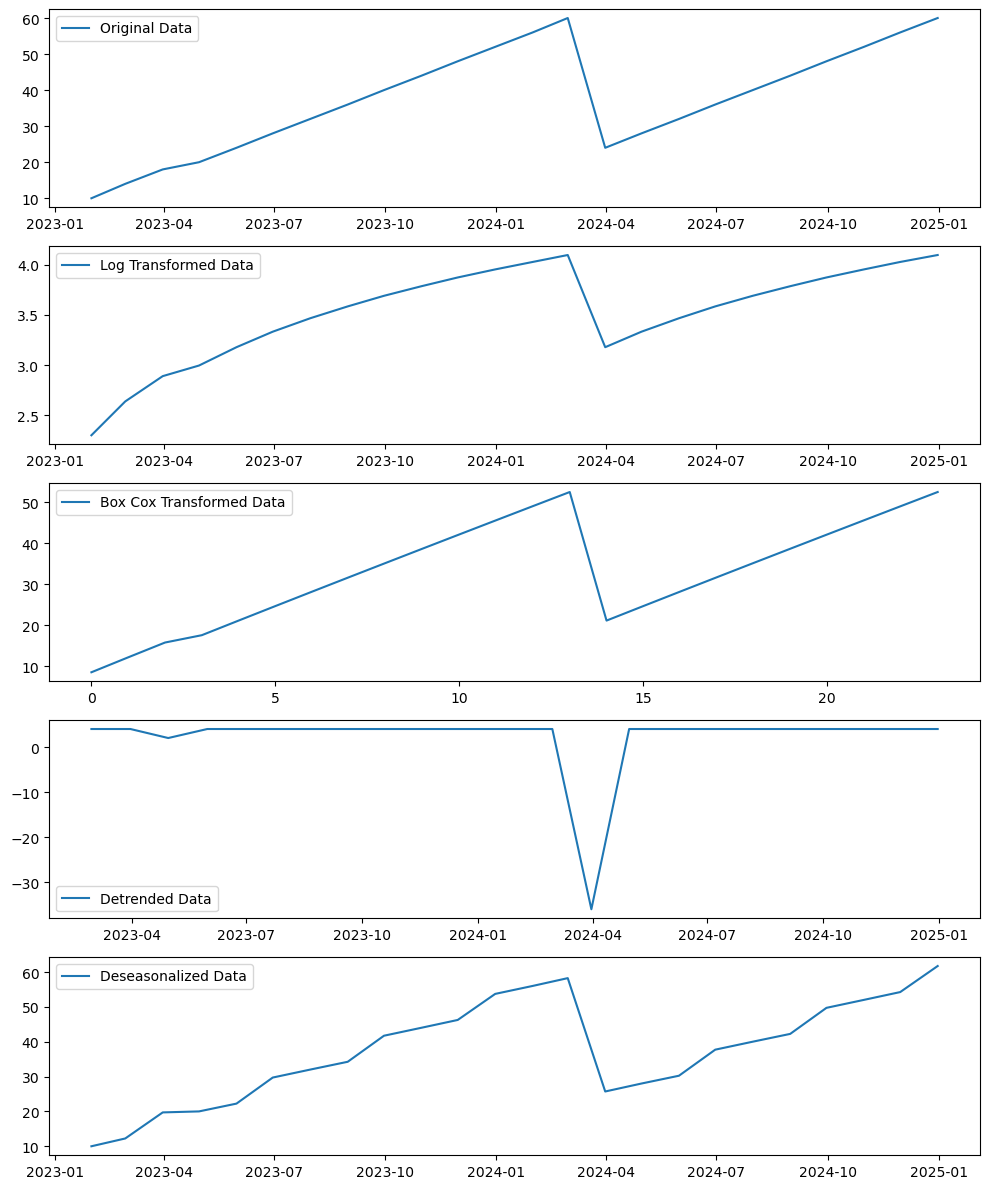

In [8]:
#plotting the change
fig,axes = plt.subplots(nrows=5, ncols=1, figsize=(10,12))
axes[0].plot(non_stationary_data, label='Original Data')
axes[0].legend()

axes[1].plot(log_transformed_data, label='Log Transformed Data')
axes[1].legend()
axes[2].plot(boxcox_tranformed_data, label='Box Cox Transformed Data')
axes[2].legend()
axes[3].plot(detrend_data, label='Detrended Data')
axes[3].legend()
axes[4].plot(deseasoned_data, label='Deseasonalized Data')
axes[4].legend()

plt.tight_layout()
plt.show()